In [6]:
# !pip install mglearn

import matplotlib.pyplot as plt
import mglearn

C:\workspace\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'target')

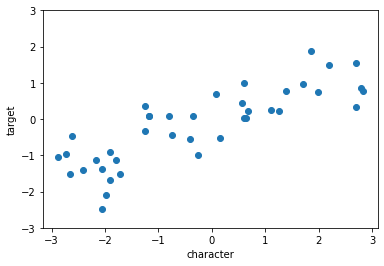

In [7]:
# 1. WAVE DATA
X, y = mglearn.datasets.make_forge()
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('character')
plt.ylabel('target')

In [17]:
# knn regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2:0.83


In [11]:
# test data를 늘려서
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.4)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.42989718  0.82597372 -1.89415682 -1.04203645 -1.63113382
  0.16931864  0.91241374 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282  0.42989718]
테스트 세트 R^2:0.68


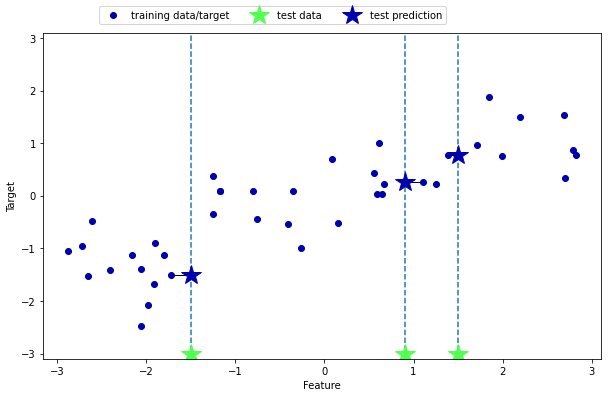

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

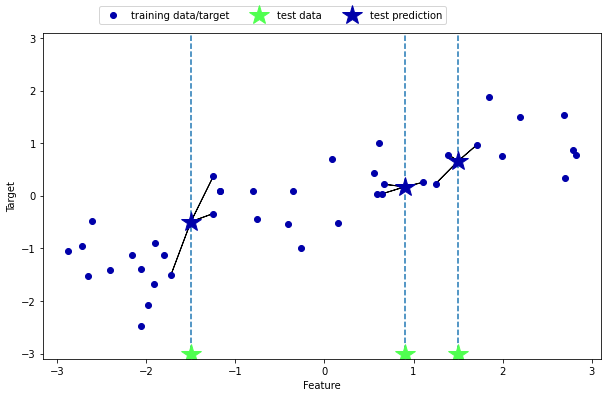

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

X_train.shpae:(30, 1) X_test.shape:(10, 1)
X_train.shpae:(30, 1) X_test.shape:(10, 1)
X_train.shpae:(30, 1) X_test.shape:(10, 1)


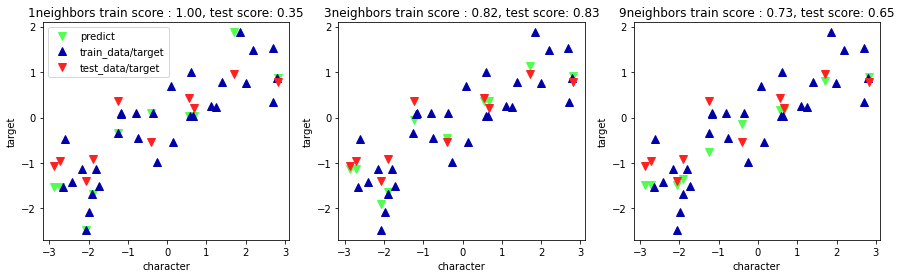

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    print('X_train.shpae:{}'.format(X_train.shape), 'X_test.shape:{}'.format(X_test.shape))
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize = 8)
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{}neighbors train score : {:.2f}, test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("character")
    ax.set_ylabel("target")
axes[0].legend(["predict", "train_data/target", "test_data/target"], loc="best")

In [30]:
# linear regression
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)
print("train score:{:.2f}".format(lr.score(X_train, y_train)))
print("test score:{:.2f}".format(lr.score(X_test, y_test)))
print("w[0]: {}, b : {}".format(lr.coef_[0], lr.intercept_))

train score:0.66
test score:0.69
w[0]: 0.44153666463089647, b : -0.01711124414733381


w[0]: 0.393906  b: -0.031804


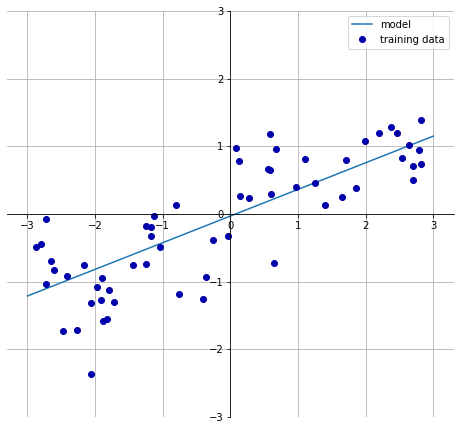

In [31]:
mglearn.plots.plot_linear_regression_wave()

In [43]:
# 2. Boston_price
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())
print(boston.feature_names)
print(boston['data'].shape)

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


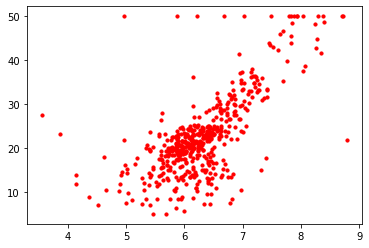

In [44]:
# 방의 개수와 주택가격 산점도
plt.scatter(boston.data[:, 5], boston.target, color='r', s = 10)

(506,)
w[0]:9.10210898118031, b:-34.67062077643857


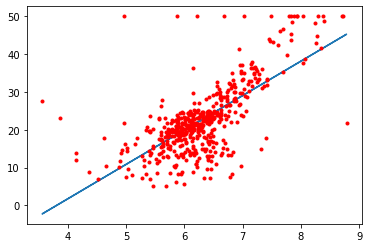

In [49]:
# 방의 개수로 선형회귀 실험
import numpy as np
X = boston.data[:, 5]
print(X.shape)
# (506,)

X_1 = np.atleast_2d(X)
# (1, 506)

X_2 = np.transpose(X_1)
# (506, 1)

y = boston.target

lr.fit(X_2, y)
y_predicted = lr.predict(X_2)

print("w[0]:{}, b:{}".format(lr.coef_[0], lr.intercept_))

plt.plot(X_2, y_predicted) # 선형 회귀선
plt.plot(X_2, y, 'o', color='r', markersize = 3)


In [56]:
# 선형회귀모델의 성능 측정
#linear regression
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
print("X_train.shape:{}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("lr_train_score:{:.2f}".format(lr.score(X_train, y_train)))
print("lr_test_score:{:.2f}\n".format(lr.score(X_test, y_test)))

#knn regression
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
lr = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
print("knn_train_score:{:.2f}".format(lr.score(X_train, y_train)))
print("knn_test_score:{:.2f}".format(lr.score(X_test, y_test)))

X_train.shape:(379, 13) X_test.shape:(127, 13)
lr_train_score:0.77
lr_test_score:0.64

knn_train_score:0.78
knn_test_score:0.51


In [61]:
# 3. boston 확장 데이터
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
print("lr_train_score:{:.2f}".format(lr.score(X_train, y_train)))
print("lr_test_score:{:.2f}\n".format(lr.score(X_test, y_test)))

#knn regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = KNeighborsRegressor().fit(X_train, y_train)
print("knn_train_score:{:.2f}".format(lr.score(X_train, y_train)))
print("knn_test_score:{:.2f}".format(lr.score(X_test, y_test)))

X.shape:(506, 104)
lr_train_score:0.95
lr_test_score:0.61

knn_train_score:0.83
knn_test_score:0.56
